# LOAD DATA

## Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from google.colab import files

## Connect to Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Train, Test and example data


In [ ]:
Train= pd.read_csv('/content/drive/MyDrive/Kaggle/data/Train_set.csv', sep = ",")
Test= pd.read_csv('/content/drive/MyDrive/Kaggle/data/Test_set.csv', sep = ",")
Sample_example = pd.read_csv('/content/drive/MyDrive/Kaggle/data/sample_submission.csv', sep = ",")

In [ ]:
Train_data = Train
Test_data = Test
Sample_submission_example = Sample_example

# Explore Data

Let's have some info about it

In [ ]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 189 entries, ID to Class
dtypes: float64(187), int64(2)
memory usage: 126.2 MB


In [ ]:
Train_data.describe()

,ID,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T178,T179,T180,T181,T182,T183,T184,T185,T186,Class
count,87554.000000,87080.000000,86635.000000,86227.000000,85843.000000,85448.000000,85074.000000,84712.000000,84416.000000,84193.000000,...,82644.000000,82678.000000,82666.000000,82667.000000,82667.000000,82656.000000,82598.000000,82626.000000,82645.000000,87554.000000
mean,43776.500000,0.890265,0.758050,0.424077,0.219220,0.201242,0.210474,0.205845,0.201837,0.198671,...,0.004991,0.004612,0.004272,0.003934,0.003662,0.003468,0.003201,0.002908,0.002734,0.473376
std,25274.807071,0.241022,0.221898,0.227297,0.206897,0.177113,0.172034,0.178602,0.177434,0.171908,...,0.043930,0.041930,0.040343,0.038546,0.037111,0.036258,0.034725,0.032650,0.031460,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21888.250000,0.921875,0.682417,0.251064,0.048417,0.082353,0.088365,0.073230,0.066018,0.064815,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43776.500000,0.991332,0.825967,0.429730,0.166197,0.148022,0.158824,0.145332,0.144465,0.149909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65664.750000,1.000000,0.910448,0.578947,0.341942,0.259138,0.287994,0.298551,0.295516,0.290850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,87553.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
Train_data.head(3)

,ID,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T178,T179,T180,T181,T182,T183,T184,T185,T186,Class
0,0,0.965812,0.792023,0.116809,0.000000,0.162393,0.213675,0.264957,0.247863,0.270655,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,1.000000,0.597015,0.000000,0.109453,0.094527,0.084577,0.074627,0.094527,0.114428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,0.831382,0.714286,0.491803,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
Test_data.head(3)

,ID,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T177,T178,T179,T180,T181,T182,T183,T184,T185,T186
0,0,0.966581,0.802057,0.077121,0.000000,0.161954,0.244216,0.254499,0.262211,0.264782,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1,1,1.000000,0.644444,0.031111,0.026667,0.151111,0.128889,0.080000,0.080000,0.084444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.000000,0.965318,0.734104,0.462428,0.271676,0.156069,0.150289,0.173410,0.173410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see, as we expected, that there will be some NAs, let's see how many

In [ ]:
sum(Train_data.iloc[:, 3].isna())

1327

In [ ]:
na = []
for i in range(len(Train_data.columns)):
  na.append(sum(Train_data.iloc[:, i].isna()))

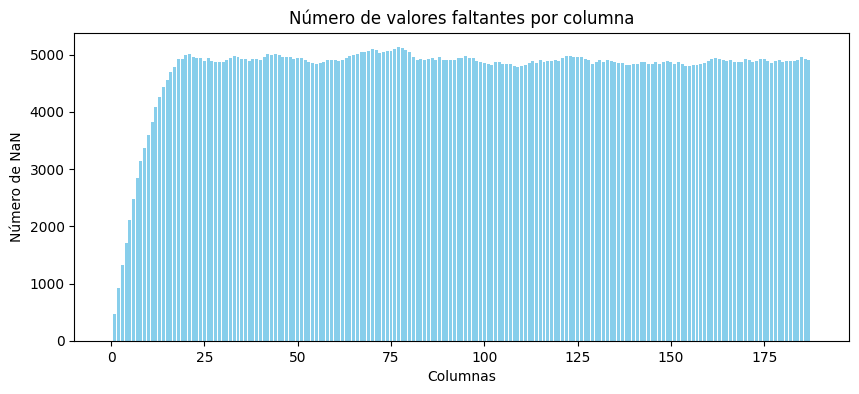

In [ ]:
plt.figure(figsize=(10,4))
plt.bar(range(len(Train_data.columns)), na, color='skyblue')
plt.xlabel('Columnas')
plt.ylabel('Número de NaN')
plt.title('Número de valores faltantes por columna')
plt.show()

In [ ]:
print(f'from a total of {len(Train_data)} rows, we have a mean of {round(np.mean(na), 2)} missing values per columns, this is, a {round((np.mean(na)/len(Train_data))*100, 1)}%')

from a total of 87554 rows, we have a mean of 4698.12 missing values per columns, this is, a 5.4%


We can see there is around 4000-5000 missing values in the columns we will treat with, this represents a 5.4% only, so we have some information to input the missing ones

Are there missing values in the first column (ID) or in the last one (class)?

In [ ]:
print(na[0], na[-1])

0 0


No, there're no missing values in those columns

## Explore data values

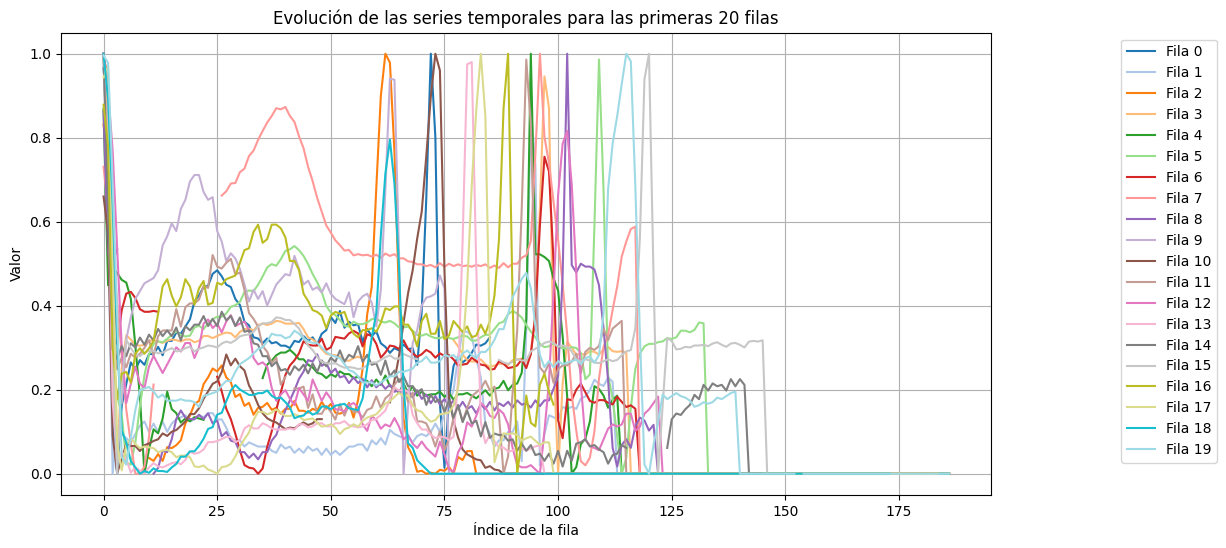

In [ ]:
# Seleccionar las primeras 20 filas y las 187 columnas
subset = Train_data.iloc[:20, 1:-1]  # Transponer para tener las columnas como series de tiempo

# Crear una figura y un eje
plt.figure(figsize=(12, 6))

# Colores para las líneas
colors = plt.cm.tab20(np.linspace(0, 1, 20))

# Iterar sobre las filas y trazar cada serie temporal con un color diferente
for i, row in enumerate(subset.values):
    plt.plot(row, label=f'Fila {i}', color=colors[i])

# Agregar leyenda, etiquetas y título
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xlabel('Índice de la fila')
plt.ylabel('Valor')
plt.title('Evolución de las series temporales para las primeras 20 filas')

# Mostrar el gráfico
plt.grid(True)
plt.show()


# Imputation of the NA's

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
def is_garbage_token(value):
    # Convertir el valor a una cadena
    value_str = str(value)

    # Verificar si el valor es 0.0
    if value_str == '0.0':
        return True
    # Verificar si el valor es un número decimal con más de un decimal
    elif '.' in value_str and len(value_str.split('.')[1]) > 1:
        return False
    else:
        return True

In [ ]:
len(Train_data)

87554

In [ ]:
np.mean(Train_data.iloc[1,:])

0.09292426729160874

In [ ]:
# Calcular las medias de cada fila una sola vez
row_means = Train_data.mean(axis=1)

# Iterar sobre las filas y columnas del DataFrame
for i, row in Train_data.iterrows():
    for j, value in row.items():
        if is_garbage_token(value):
            # Reemplazar el valor con la media de la fila
            Train_data.at[i, j] = row_means[i]


In [ ]:
def impute_nan_values(df):
    # Iterate over each NaN value in the DataFrame
    for i, col in enumerate(df.columns):
        for j in range(len(df)):
            if pd.isna(df.iloc[j, i]):
                # Get non-garbage values in the same row and column
                row_values = df.iloc[j, :].where(df.iloc[j, :].apply(lambda x: not is_garbage_token(x)))
                col_values = df.iloc[:, i].where(df.iloc[:, i].apply(lambda x: not is_garbage_token(x)))

                # Exclude NaNs and garbage tokens
                row_values = row_values.dropna()
                col_values = col_values.dropna()

                # If there are valid values in both row and column, take their mean
                if len(row_values) > 0 and len(col_values) > 0:
                    df.iloc[j, i] = (row_values.mean() + col_values.mean()) / 2
                # If there are only valid values in the row, take their mean
                elif len(row_values) > 0:
                    df.iloc[j, i] = row_values.mean()
                # If there are only valid values in the column, take their mean
                elif len(col_values) > 0:
                    df.iloc[j, i] = col_values.mean()

    return df


In [ ]:
Train_imputed = impute_nan_values(Train_data)
Test_imputed = impute_nan_values(Test_data)

KeyboardInterrupt: 

In [ ]:
Train_imputed.isna()

In [ ]:
corr = Train_data.corr()
corr

Linear regresion entre la columna anterior y posterior para los nans (haciendo knn imputation cuando el de al lado es nan tambien usando toda la columna)

## KNN Imputer

In [ ]:
def encontrar_longitud_real(df):
    longitudes_reales = []
    for indice, fila in df.iterrows():
        longitud_real = len(fila) - 1  # Comenzamos con la longitud máxima posible
        for valor in reversed(fila):  # Iteramos desde el final de la fila
            if valor != 0:  # Si encontramos un valor distinto de cero, terminamos
                break
            longitud_real -= 1
        longitudes_reales.append(longitud_real)
    return longitudes_reales

longitudes_reales_train=encontrar_longitud_real(Train_data)
longitudes_reales_test=encontrar_longitud_real(Test_data)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor

#funcion para saber las filas que cumplen que en la columna que estamos tratando no tienen ya zero padding values
#para evitar estimar con esos zero values
def is_not_zero_padded(con_index, longitudes_reales):
    index_valid_rows=[]
    for index in range(len(longitudes_reales)):
      if longitudes_reales[index]>con_index+1:
        index_valid_rows.append(index)
    return index_valid_rows

def lm_imputer_with_knn_and_garbaje_selection(df, longitudes_reales):
    # Crear un imputador KNN
    imputer = KNNImputer(n_neighbors=3)

    columnames=[]
    for col in df.columns:
      columnames.append(col)


    for col in range(len(columnames)):
        if col==0:

            valid_rows=is_not_zero_padded(col,longitudes_reales)
            if len(valid_rows)>0:
                # 1. Create training data with a subset of data where there are no missing values in the prev_col, col and next_col variables
                actual_df = df.loc[valid_rows,[columnames[col],columnames[col+1]]].dropna(axis=0)
            else:
                actual_df = df.loc[:,[columnames[col],columnames[col+1]]].dropna(axis=0)
            X = actual_df.iloc[:, 1]
            y = actual_df.iloc[:, 0]

            # 2. Create test data to impute missing values
            # find the entries with col missing
            missing_col = df.loc[:,columnames[col]].isnull()
            if sum(missing_col)==0:
                continue
            # extract the tips of observations with col missing
            prev_next_col_missing = pd.DataFrame(df.loc[:,columnames[col+1]][missing_col])

            imputed_values = imputer.fit_transform(prev_next_col_missing)

            ## 3. Train a linear regression model to estimate total bill from tip values
            # fit a linear model
            knn = KNeighborsRegressor(n_neighbors=3, weights = 'distance')
            X_reshaped = X.values.reshape(-1, 1)
            #knn.fit(X_reshaped,y)
            # use fitted model and tip values to predict missing total_bill
            #bill_pred = knn.predict(imputed_values)
            #df.iloc[missing_col[missing_col].index, col] = bill_pred
            lm=LinearRegression()
            lm.fit(X_reshaped,y)
            # use fitted model and tip values to predict missing total_bill
            bill_pred = lm.predict(imputed_values)
            df.iloc[missing_col[missing_col].index, col] = bill_pred

        elif col==186:
            valid_rows=is_not_zero_padded(col,longitudes_reales)
            if len(valid_rows)>0:
                # 1. Create training data with a subset of data where there are no missing values in the prev_col, col and next_col variables
                actual_df = df.loc[valid_rows,[columnames[col-1], columnames[col]]].dropna(axis=0)
            else:
                actual_df = df.loc[:,[columnames[col-1], columnames[col]]].dropna(axis=0)
            # 1. Create training data with a subset of data where there are no missing values in the prev_col, col and next_col variables

            X = actual_df.iloc[:, 0]
            y = actual_df.iloc[:, 1]

            # 2. Create test data to impute missing values
            # find the entries with total_bill_missing
            missing_col = df.loc[:,columnames[col]].isnull()
            if sum(missing_col)==0:
                continue
            # extract the tips of observations with total_bill_missing
            prev_next_col_missing = pd.DataFrame(df.loc[:,columnames[col-1]][missing_col])

            imputed_values = imputer.fit_transform(prev_next_col_missing)

            ## 3. Train a linear regression model to estimate total bill from tip values
            # fit a linear model
            knn = KNeighborsRegressor(n_neighbors=3, weights = 'distance')
            X_reshaped = X.values.reshape(-1, 1)
            #knn.fit(X_reshaped,y)
            # use fitted model and tip values to predict missing total_bill
            #bill_pred = knn.predict(imputed_values)
            #df.iloc[missing_col[missing_col].index, col] = bill_pred
            lm=LinearRegression()
            lm.fit(X_reshaped,y)
            # use fitted model and tip values to predict missing total_bill
            bill_pred = lm.predict(imputed_values)
            df.iloc[missing_col[missing_col].index, col] = bill_pred

        else:
            valid_rows=is_not_zero_padded(col,longitudes_reales)
            if len(valid_rows)>0:
                # 1. Create training data with a subset of data where there are no missing values in the prev_col, col and next_col variables
                actual_df = df.loc[valid_rows,[columnames[col-1], columnames[col], columnames[col+1]]].dropna(axis=0)
            else:
                actual_df = df.loc[:,[columnames[col-1], columnames[col], columnames[col+1]]].dropna(axis=0)


            X = actual_df.iloc[:, [0, 2]]
            y = actual_df.iloc[:, 1]

            # 2. Create test data to impute missing values
            # find the entries with total_bill_missing
            missing_col = df.loc[:,columnames[col]].isnull()
            if sum(missing_col)==0:
                continue
            # extract the tips of observations with total_bill_missing
            prev_next_col_missing = pd.DataFrame(df.loc[:,[columnames[col-1],columnames[col+1]]][missing_col])

            imputed_values = imputer.fit_transform(prev_next_col_missing)

            ## 3. Train a linear regression model to estimate total bill from tip values
            # fit a linear model

            #knn = KNeighborsRegressor(n_neighbors=3, weights = 'distance')
            #knn.fit(X,y)
            lm=LinearRegression()
            lm.fit(X,y)
            # use fitted model and tip values to predict missing total_bill
            bill_pred = lm.predict(imputed_values)
            df.iloc[missing_col[missing_col].index, col] = bill_pred

    return df



In [ ]:
Train_imputed=lm_imputer_with_knn_and_garbaje_selection(Train_data.iloc[:,1:-1], longitudes_reales_train)
Test_imputed=lm_imputer_with_knn_and_garbaje_selection(Test_data.iloc[:,1:], longitudes_reales_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

Let's see now if there're missing values:

In [ ]:
na_imputed = []
for i in range(len(Train_imputed.columns)):
  na_imputed.append(sum(Train_imputed.iloc[:, i].isna()))

In [ ]:
print(f'from a total of {len(Train_imputed)} rows, we have a mean of {round(np.mean(na_imputed), 2)} missing values per columns, this is, a {round((np.mean(na_imputed)/len(Train_imputed))*100, 1)}% after imputation')

from a total of 87554 rows, we have a mean of 0.0 missing values per columns, this is, a 0.0% after imputation


In [ ]:
max(na_imputed)

0

In [ ]:
display(Train_imputed)

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T177,T178,T179,T180,T181,T182,T183,T184,T185,T186
0,0.965812,0.792023,0.116809,0.000000,0.162393,0.213675,0.264957,0.247863,0.270655,0.259259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.597015,0.000000,0.109453,0.094527,0.084577,0.074627,0.094527,0.114428,0.124378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.831382,0.714286,0.491803,0.167069,0.132043,0.213669,0.190785,0.160015,0.131373,0.080860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.837705,0.236066,0.037705,0.252459,0.329508,0.319672,0.306557,0.304918,0.306557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.868590,0.448718,0.490385,0.477564,0.461538,0.455128,0.416667,0.304487,0.182692,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.000000,0.060127,0.202532,0.306962,0.424051,0.471519,0.588608,0.664557,0.702532,0.715190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.971154,0.910256,0.548077,0.307012,0.137662,0.148496,0.094493,0.113613,0.115028,0.220744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,1.000000,0.976378,0.527559,0.289370,0.084646,0.055118,0.066929,0.059055,0.055118,0.043307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.907563,1.000000,0.464286,0.046218,0.241597,0.336134,0.283613,0.283613,0.300420,0.300420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Suponiendo que Train_imputed es tu DataFrame
Train_imputed_diff = Train_imputed.diff(axis=1).iloc[:, 1:]
display(Train_imputed_diff)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T177,T178,T179,T180,T181,T182,T183,T184,T185,T186
0,-0.173789,-0.675214,-0.116809,0.162393,0.051282,0.051282,-0.017094,0.022792,-0.011396,0.025641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.402985,-0.597015,0.109453,-0.014925,-0.009950,-0.009950,0.019901,0.019900,0.009950,-0.024876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.117096,-0.222482,-0.324734,-0.035026,0.081625,-0.022884,-0.030770,-0.028641,-0.050513,-0.043389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.162295,-0.601639,-0.198361,0.214754,0.077049,-0.009836,-0.013115,-0.001639,0.001639,0.009836,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.419872,0.041667,-0.012821,-0.016026,-0.006410,-0.038462,-0.112179,-0.121795,-0.182692,0.057692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.060127,0.142405,0.104430,0.117089,0.047468,0.117089,0.075949,0.037975,0.012658,0.025316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,-0.060897,-0.362179,-0.241065,-0.169351,0.010834,-0.054003,0.019120,0.001415,0.105716,0.000341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,-0.023622,-0.448819,-0.238189,-0.204724,-0.029528,0.011811,-0.007874,-0.003937,-0.011811,-0.003937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.092437,-0.535714,-0.418067,0.195378,0.094538,-0.052521,0.000000,0.016807,0.000000,-0.010504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Nan handled method 3: LSTM fumada esto de momento no va jaja

In [ ]:
from sklearn.model_selection import train_test_split

import torch.optim as optim
import torch.utils.data as data

def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for row in range(len(dataset)-1):

      for i in range(len(dataset.columns)-lookback):
          feature = dataset.iloc[row,i:i+lookback]
          target = dataset.iloc[row,i+1:i+lookback+1]
          X.append(feature)
          y.append(target)
    return torch.tensor(X), torch.tensor(y)

# Dividir el conjunto de entrenamiento en train y test con una proporción del 70% para train y 30% para test
train, test, y_train_labels, y_test_labels = train_test_split(Train_data.drop(columns=['Class']), Train_data['Class'], test_size=0.3, random_state=42)

lookback = 5
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

model = Model()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train Cross entropy Loss %.4f, test Cross entropy Loss %.4f" % (epoch, train_rmse, test_rmse))


KeyboardInterrupt: 

Let's see the progression now:

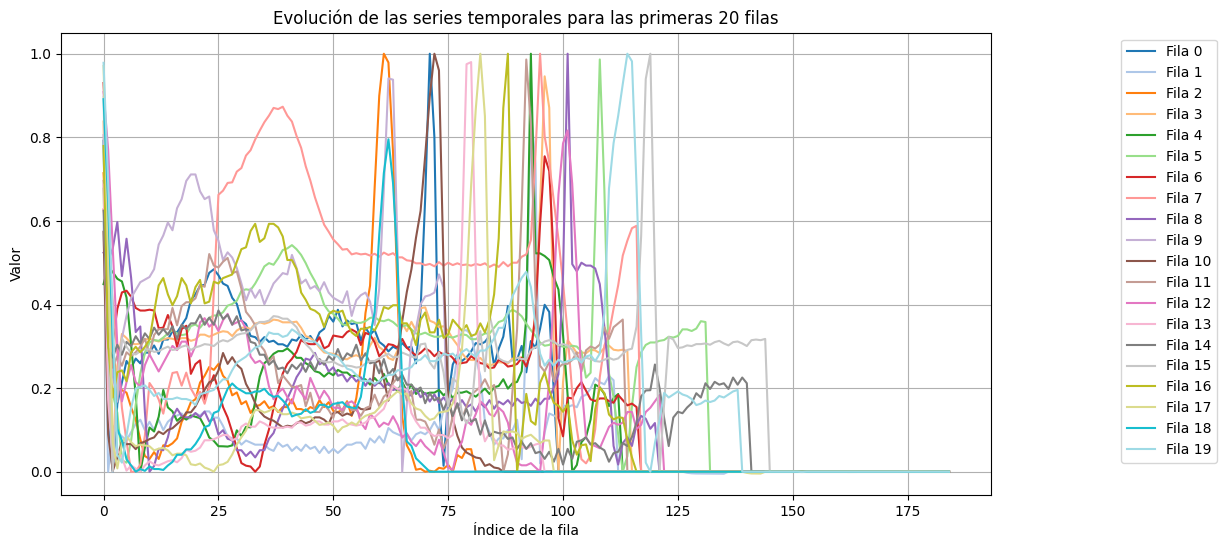

In [ ]:
# Seleccionar las primeras 20 filas y las 187 columnas
subset = Train_imputed.iloc[:20, 1:-1]  # Transponer para tener las columnas como series de tiempo

# Crear una figura y un eje
plt.figure(figsize=(12, 6))

# Colores para las líneas
colors = plt.cm.tab20(np.linspace(0, 1, 20))

# Iterar sobre las filas y trazar cada serie temporal con un color diferente
for i, row in enumerate(subset.values):
    plt.plot(row, label=f'Fila {i}', color=colors[i])

# Agregar leyenda, etiquetas y título
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xlabel('Índice de la fila')
plt.ylabel('Valor')
plt.title('Evolución de las series temporales para las primeras 20 filas')

# Mostrar el gráfico
plt.grid(True)
plt.show()


# Data insights

Now, let's see the balance of the classes

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10,4))
plt.bar(Train_imputed["Class"].value_counts().index, Train_imputed["Class"].value_counts().values)

# Añadir etiquetas y título
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Classes distribution')

# Mostrar el gráfico
plt.show()

Well, it seems extremely unbalanced

In [ ]:
num_0 = len(Train_imputed[Train_imputed["Class"] == 0])
num_1 = len(Train_imputed[Train_imputed["Class"] == 1])
num_2 = len(Train_imputed[Train_imputed["Class"] == 2])
num_3 = len(Train_imputed[Train_imputed["Class"] == 3])
num_4 = len(Train_imputed[Train_imputed["Class"] == 4])

print(f'The proportion of elements from class 0 is a {round((num_0/len(Train_imputed))*100, 1)}%')
print(f'The proportion of elements from class 1 is a {round((num_1/len(Train_imputed))*100, 1)}%')
print(f'The proportion of elements from class 2 is a {round((num_2/len(Train_imputed))*100, 1)}%')
print(f'The proportion of elements from class 3 is a {round((num_3/len(Train_imputed))*100, 1)}%')
print(f'The proportion of elements from class 4 is a {round((num_4/len(Train_imputed))*100, 1)}%')

This is, the relation between classes is:

In [ ]:
relation_0 = round(1/(num_0/len(Train_imputed)), 1)
relation_1 = round(1/(num_1/len(Train_imputed)), 1)
relation_2 = round(1/(num_2/len(Train_imputed)), 1)
relation_3 = round(1/(num_3/len(Train_imputed)), 1)
relation_4 = round(1/(num_4/len(Train_imputed)), 1)

print(f'For a balance weight, the importance of the 0 class might be {relation_0}')
print(f'For a balance weight, the importance of the 1 class might be {relation_1}')
print(f'For a balance weight, the importance of the 2 class might be {relation_2}')
print(f'For a balance weight, the importance of the 3 class might be {relation_3}')
print(f'For a balance weight, the importance of the 4 class might be {relation_4}')

See that all the columns are among the same range: [0-1], so no normalization is needed this time.

To finish with the pre-processing, let's save the IDs columns in a separate variable as it is totally uninformative but we have to send it together with the solution

In [ ]:
Train_IDs = Train_imputed["ID"]
Test_IDs = Test_imputed["ID"]

# Neural Network

## X, Y split

In [ ]:
# Eliminar la primera columna de ID (no informativa)
Train_imputed.drop(columns=['ID'], inplace=True)

In [ ]:
# Dividir los datos en características y etiquetas
X = Train_imputed.iloc[:, :-1].values
y = Train_imputed.iloc[:, -1].values

# Preprocesamiento de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
def f1_metric(y_true, y_pred):
    # Convert predictions to class labels
    y_pred_labels = tf.argmax(y_pred, axis=1)

    # Calculate F1-score using scikit-learn's f1_score function
    f1 = tf.py_function(lambda y_true, y_pred_labels: f1_score(y_true, y_pred_labels, average='macro'),
                        (y_true, y_pred_labels), tf.float64)

    return f1

## RED

In [ ]:
from sklearn.model_selection import train_test_split

def crear_validation_set(df, test_size=0.2, random_state=None):
    # Dividir los datos en entrenamiento y validación
    train_set, validation_set = train_test_split(df, test_size=test_size, random_state=random_state)
    return train_set, validation_set

# Extraer la columna 'Edad' de df2 como una lista
classes = Train_data['Class'].tolist()

# Añadir la lista de edades como una nueva columna 'Edad' en df1
Train_imputed['Class'] = classes
# Ejemplo de uso
train_set, validation_set = crear_validation_set(Train_imputed)

longitudes_reales_train = encontrar_longitud_real(train_set)
longitudes_reales_val=encontrar_longitud_real(validation_set)
longitudes_reales_test = encontrar_longitud_real(Test_imputed)
y_train= train_set['Class'].values
y_val= validation_set['Class'].values

In [ ]:
train_set_list = train_set.values.tolist()
val_set_list = validation_set.values.tolist()

In [ ]:
my_RNN_atenta = RNN_with_train(input_size=188, output_size=5, hidden_dim=40, n_layers=1, prob=0.3)
my_RNN_atenta.fit(train_set_list, val_set_list, y_train, y_val, longitudes_reales_train, longitudes_reales_val, epochs=10, print_every=1)

Epoch 1/10, Training Loss: nan
Validation Loss: nan, Validation F1: 0.23582141717975666
Epoch 2/10, Training Loss: nan
Validation Loss: nan, Validation F1: 0.23582141717975666
Epoch 3/10, Training Loss: nan
Validation Loss: nan, Validation F1: 0.23582141717975666


KeyboardInterrupt: 

## LSTM con window size 5

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset

# Definir el modelo de la red LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Tomar solo el último paso de tiempo
        return out

# Función de métrica F1
def f1_metric(y_true, y_pred):
    y_pred_labels = torch.argmax(y_pred, axis=1).cpu().numpy()
    f1 = f1_score(y_true.cpu().numpy(), y_pred_labels, average='macro')
    return f1

# Hiperparámetros
input_size = 1  # Número de características de entrada (dimensiones de la serie temporal)
hidden_size = 64  # Tamaño de la capa oculta de la LSTM
num_layers = 1  # Número de capas de la LSTM
num_classes = 6  # Número de clases (de 0 a 5)

# Inicializar el modelo
model = LSTMModel(input_size, hidden_size, num_layers, num_classes)

# Definir función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()  # Función de pérdida de entropía cruzada
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizador Adam

from sklearn.model_selection import train_test_split

# Supongamos que Train_data contiene tus datos y labels
# Supongamos que X_train contiene las características y y_train contiene las etiquetas

# Dividir el conjunto de entrenamiento en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(Train_data.drop(columns=['Class']), Train_data['Class'], test_size=0.2, random_state=42)

# Convertir los conjuntos de datos a tensores de PyTorch
X_train_tensor = torch.Tensor(X_train.values)
y_train_tensor = torch.LongTensor(y_train.values)
X_test_tensor = torch.Tensor(X_test.values)
y_test_tensor = torch.LongTensor(y_test.values)

# Crear conjuntos de datos y dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Entrenamiento del modelo
num_epochs = 15

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    total_f1 = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.unsqueeze(-1))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_f1 += f1_metric(labels, outputs)

    train_loss = total_loss / len(train_loader)
    train_f1 = total_f1 / len(train_loader)

    model.eval()
    total_f1 = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs.unsqueeze(-1))
            total_f1 += f1_metric(labels, outputs)

    test_f1 = total_f1 / len(test_loader)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train F1: {train_f1:.4f}, Test F1: {test_f1:.4f}')


Epoch [1/15], Train Loss: nan, Train F1: 0.2236, Test F1: 0.2252
Epoch [2/15], Train Loss: nan, Train F1: 0.2240, Test F1: 0.2252
Epoch [3/15], Train Loss: nan, Train F1: 0.2238, Test F1: 0.2252
Epoch [4/15], Train Loss: nan, Train F1: 0.2237, Test F1: 0.2252
Epoch [5/15], Train Loss: nan, Train F1: 0.2242, Test F1: 0.2252
Epoch [6/15], Train Loss: nan, Train F1: 0.2230, Test F1: 0.2252
Epoch [7/15], Train Loss: nan, Train F1: 0.2246, Test F1: 0.2252


KeyboardInterrupt: 

# Document assignment

## Original shape

In [ ]:
Sample_submission_example.info()

In [ ]:
Sample_submission_example.head(5)

## Test_data part

So see that we have to predict the Test_data observations

In [ ]:
Test_data.info()

In [ ]:
Test_data.head(2)

## Predict Test_data

In [ ]:
# Supongamos que Test_data es tu DataFrame de prueba
X_test_data = Test_data.iloc[:, 1:].values  # Selecciona todas las columnas excepto la primera (ID)

# Preprocesamiento de datos
X_test_scaled = scaler.transform(X_test_data)  # Escala los datos de prueba utilizando el mismo scaler que utilizaste para el conjunto de entrenamiento

# Realiza las predicciones
y_pred_test = np.argmax(model.predict(X_test_scaled[..., np.newaxis]), axis=-1)

# Ahora y_pred_test contiene las predicciones de clase para tu conjunto Test_data


In [ ]:
print(y_pred_test)

See the classes balance, just for a hint

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener las clases y sus frecuencias para las clases reales
real_classes, real_counts = np.unique(Train_imputed["Class"], return_counts=True)
real_total = real_counts.sum()

# Obtener las frecuencias de las clases predichas
pred_classes, pred_counts = np.unique(y_pred_test, return_counts=True)
pred_total = pred_counts.sum()

# Obtener todas las clases únicas
all_classes = np.unique(np.concatenate((real_classes, pred_classes)))

# Obtener las frecuencias para cada clase (rellenando con ceros si una clase no está presente en las predicciones o en los datos reales)
real_counts_dict = dict(zip(real_classes, real_counts))
pred_counts_dict = dict(zip(pred_classes, pred_counts))

real_counts_all = np.array([real_counts_dict.get(cls, 0) for cls in all_classes]) / real_total
pred_counts_all = np.array([pred_counts_dict.get(cls, 0) for cls in all_classes]) / pred_total

# Crear el gráfico de barras
plt.figure(figsize=(15, 5))
bar_width = 0.35
index = np.arange(len(all_classes))

# Barras para los valores reales
plt.bar(index, real_counts_all, bar_width, label='Actual')

# Barras para los valores predichos
plt.bar(index + bar_width, pred_counts_all, bar_width, label='Predicted')

# Añadir etiquetas y título
plt.xlabel('Classes')
plt.ylabel('Frequency Proportion')
plt.title('Classes Distribution')
plt.xticks(index + bar_width / 2, all_classes)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


As we might have expected, we have predicted a bit more of the "0" class (it's normal as it is the largest one and the algorithm tends to predict it)

# Join Datasets

In [ ]:
IDs = Test_data["ID"]

Final_prediction = pd.DataFrame({'ID': IDs, 'Pred_Class': y_pred_test})
print(Final_prediction.head())

Perfect, let's download it

In [ ]:
Final_prediction.to_csv('Final_prediction.csv', index=False)

# Descargar el archivo CSV
files.download('Final_prediction.csv')